<a href="https://colab.research.google.com/github/Kayo-png/Colab-projects/blob/senai_lessons/15_Aula_16_Jun%C3%A7%C3%A3o_de_tabelas%2C_matplotlib_e_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 16

- Junção de Tabelas
- MatplotLib (Subplot)
- Yahoo Finance


## Junção de Tabelas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime

url1_vale = '/content/drive/MyDrive/Colab Notebooks/Programação em python para Data Science/Aula 14 - Ações/VALE3.SA.csv'

url2_usim = '/content/drive/MyDrive/Colab Notebooks/Programação em python para Data Science/Aula 14 - Ações/USIM5.SA.csv'

vale3 = pd.read_csv(url1_vale)

usim5 = pd.read_csv(url2_usim)


vale3.Date = pd.to_datetime(vale3.Date)


usim5.Date = pd.to_datetime(usim5.Date)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Função Concat

In [ ]:
pd.concat([vale3, usim5])



,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,3.500000,3.542500,3.500000,3.500000,1.665134,585600.0
1,2000-01-04,3.466666,3.474166,3.416666,3.416666,1.625488,782400.0
2,2000-01-05,3.375000,3.416666,3.375000,3.416666,1.625488,1876800.0
3,2000-01-06,3.416666,3.500000,3.416666,3.416666,1.625488,792000.0
4,2000-01-07,3.458333,3.559166,3.458333,3.541666,1.684958,5347200.0
...,...,...,...,...,...,...,...
5884,2023-06-05,7.420000,7.460000,7.290000,7.410000,7.410000,5639600.0
5885,2023-06-06,7.410000,7.480000,7.380000,7.390000,7.390000,14242400.0
5886,2023-06-07,7.440000,7.440000,7.290000,7.340000,7.340000,9641600.0
5887,2023-06-09,7.390000,7.450000,7.300000,7.330000,7.330000,12946200.0


In [ ]:
reset_indice = pd.concat([vale3, usim5], ignore_index=True)
# A função concat adiciona uma tabela logo abaixo da outra, fazendo com que haja 1 tabela só partilhando as mesmas colunas
# Logo, o indice se mantem e faz com que haja 2 ínicios, e a função ignore_index = True reseta o indice

In [ ]:
reset_indice

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,3.500000,3.542500,3.500000,3.500000,1.665134,585600.0
1,2000-01-04,3.466666,3.474166,3.416666,3.416666,1.625488,782400.0
2,2000-01-05,3.375000,3.416666,3.375000,3.416666,1.625488,1876800.0
3,2000-01-06,3.416666,3.500000,3.416666,3.416666,1.625488,792000.0
4,2000-01-07,3.458333,3.559166,3.458333,3.541666,1.684958,5347200.0
...,...,...,...,...,...,...,...
11774,2023-06-05,7.420000,7.460000,7.290000,7.410000,7.410000,5639600.0
11775,2023-06-06,7.410000,7.480000,7.380000,7.390000,7.390000,14242400.0
11776,2023-06-07,7.440000,7.440000,7.290000,7.340000,7.340000,9641600.0
11777,2023-06-09,7.390000,7.450000,7.300000,7.330000,7.330000,12946200.0


## MatplotLib

In [ ]:
df_juntos = pd.merge(vale3, usim5, on='Date', suffixes = ['_vale', '_usim'])
# A função .merge() une os dois dataframes em um, porém, por eles terem nomes de
# colunas sempelhantes, as colunas são renomeadas com x para primeira tabela e y
# para a segunda, e com o parametro suffixes é possível renomeá-las
df_juntos.head()

,Date,Open_vale,High_vale,Low_vale,Close_vale,Adj Close_vale,Volume_vale,Open_usim,High_usim,Low_usim,Close_usim,Adj Close_usim,Volume_usim
0,2000-01-03,3.500000,3.542500,3.500000,3.500000,1.665134,585600.0,2.177777,2.180000,2.122222,2.133333,1.509654,571500.0
1,2000-01-04,3.466666,3.474166,3.416666,3.416666,1.625488,782400.0,2.111111,2.111111,2.055555,2.055555,1.454614,1121400.0
2,2000-01-05,3.375000,3.416666,3.375000,3.416666,1.625488,1876800.0,2.066666,2.255555,2.055555,2.251111,1.592999,1602450.0
3,2000-01-06,3.416666,3.500000,3.416666,3.416666,1.625488,792000.0,2.222222,2.455555,2.222222,2.455555,1.737674,3084300.0
4,2000-01-07,3.458333,3.559166,3.458333,3.541666,1.684958,5347200.0,2.455555,2.577777,2.444444,2.553333,1.806867,2871000.0


###Comparação de valorização %

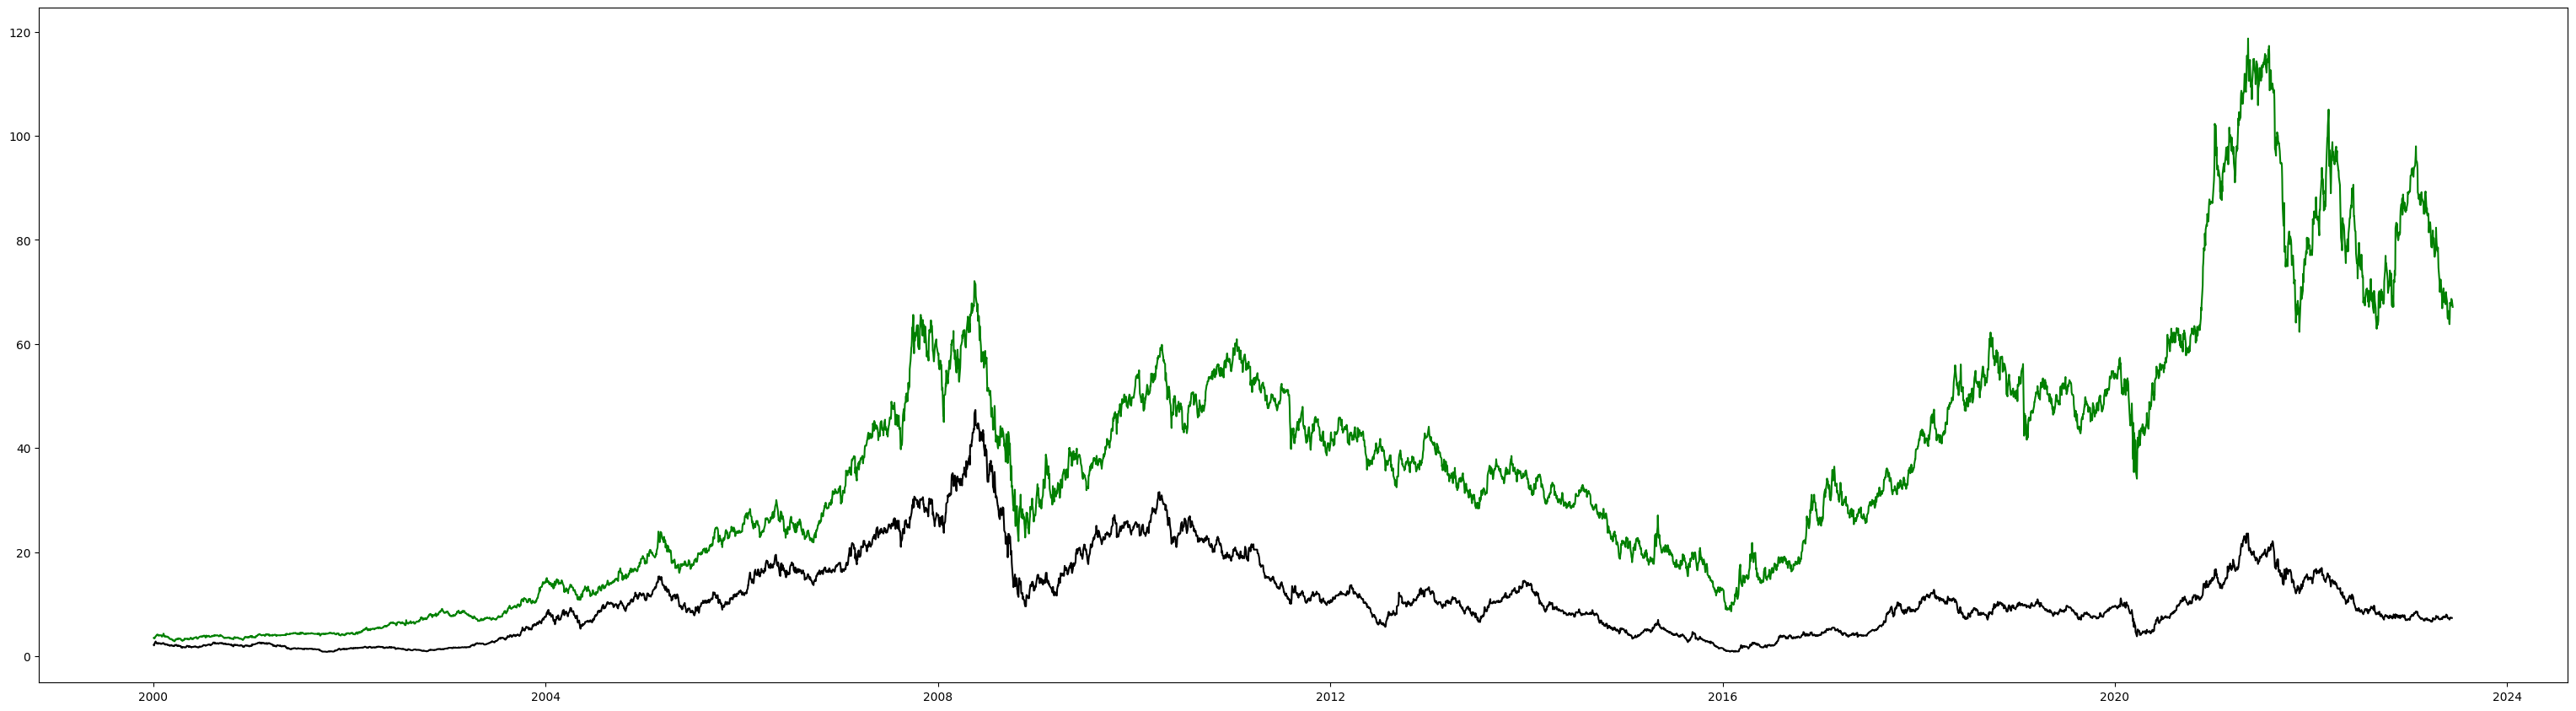

In [ ]:
fig1 = plt.figure(figsize=(15,8))
eixo1 = fig1.add_axes([0,0,2,1])

eixo1.plot(df_juntos.Date, df_juntos.Close_vale, color='green')
eixo1.plot(df_juntos.Date, df_juntos.Close_usim, color='black')

plt.show()

Calculo e grafico da variação.

In [ ]:
df_juntos.head()

,Date,Open_vale,High_vale,Low_vale,Close_vale,Adj Close_vale,Volume_vale,Open_usim,High_usim,Low_usim,Close_usim,Adj Close_usim,Volume_usim
0,2000-01-03,3.500000,3.542500,3.500000,3.500000,1.665134,585600.0,2.177777,2.180000,2.122222,2.133333,1.509654,571500.0
1,2000-01-04,3.466666,3.474166,3.416666,3.416666,1.625488,782400.0,2.111111,2.111111,2.055555,2.055555,1.454614,1121400.0
2,2000-01-05,3.375000,3.416666,3.375000,3.416666,1.625488,1876800.0,2.066666,2.255555,2.055555,2.251111,1.592999,1602450.0
3,2000-01-06,3.416666,3.500000,3.416666,3.416666,1.625488,792000.0,2.222222,2.455555,2.222222,2.455555,1.737674,3084300.0
4,2000-01-07,3.458333,3.559166,3.458333,3.541666,1.684958,5347200.0,2.455555,2.577777,2.444444,2.553333,1.806867,2871000.0


In [ ]:
df_juntos['Close_vale'][0]

np.float64(3.5)

In [ ]:
df_juntos['var%_vale']= df_juntos['Close_vale'].div(df_juntos['Close_vale'][0])-1


In [ ]:
df_juntos['var%_usim']= df_juntos['Close_usim'].div(df_juntos['Close_usim'][0])-1

In [ ]:
df_juntos

,Date,Open_vale,High_vale,Low_vale,Close_vale,Adj Close_vale,Volume_vale,Open_usim,High_usim,Low_usim,Close_usim,Adj Close_usim,Volume_usim,var%_vale,var%_usim
0,2000-01-03,3.500000,3.542500,3.500000,3.500000,1.665134,585600.0,2.177777,2.180000,2.122222,2.133333,1.509654,571500.0,0.000000,0.000000
1,2000-01-04,3.466666,3.474166,3.416666,3.416666,1.625488,782400.0,2.111111,2.111111,2.055555,2.055555,1.454614,1121400.0,-0.023810,-0.036458
2,2000-01-05,3.375000,3.416666,3.375000,3.416666,1.625488,1876800.0,2.066666,2.255555,2.055555,2.251111,1.592999,1602450.0,-0.023810,0.055208
3,2000-01-06,3.416666,3.500000,3.416666,3.416666,1.625488,792000.0,2.222222,2.455555,2.222222,2.455555,1.737674,3084300.0,-0.023810,0.151042
4,2000-01-07,3.458333,3.559166,3.458333,3.541666,1.684958,5347200.0,2.455555,2.577777,2.444444,2.553333,1.806867,2871000.0,0.011905,0.196875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,2023-06-05,68.470001,68.480003,66.629997,67.379997,67.379997,21478500.0,7.420000,7.460000,7.290000,7.410000,7.410000,5639600.0,18.251428,2.473438
5885,2023-06-06,67.800003,68.389999,67.400002,67.599998,67.599998,31884200.0,7.410000,7.480000,7.380000,7.390000,7.390000,14242400.0,18.314285,2.464063
5886,2023-06-07,67.599998,68.680000,67.400002,68.669998,68.669998,27377500.0,7.440000,7.440000,7.290000,7.340000,7.340000,9641600.0,18.619999,2.440626
5887,2023-06-09,69.669998,69.800003,68.250000,68.360001,68.360001,30056800.0,7.390000,7.450000,7.300000,7.330000,7.330000,12946200.0,18.531429,2.435938


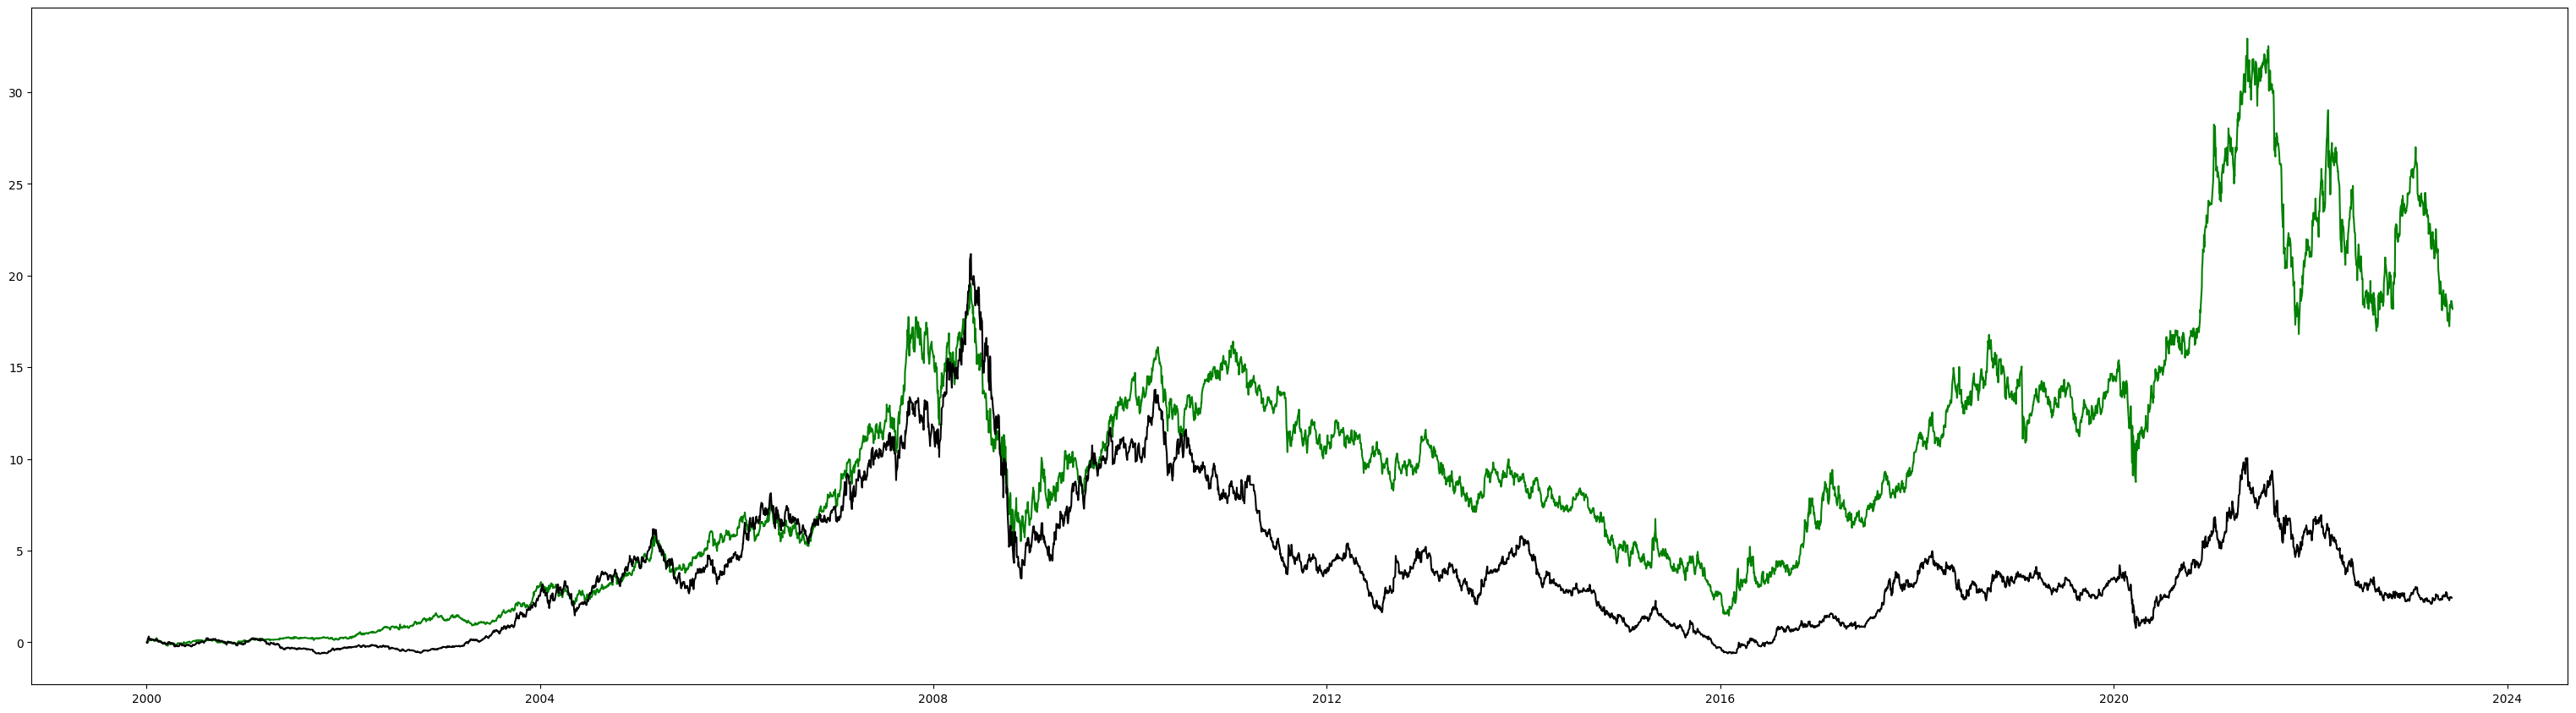

In [ ]:
fig1 = plt.figure(figsize=(15,8))
eixo1 = fig1.add_axes([0,0,2,1])

eixo1.plot(df_juntos.Date, df_juntos['var%_vale'], color='green')
eixo1.plot(df_juntos.Date, df_juntos['var%_usim'], color='black')

### Subplot

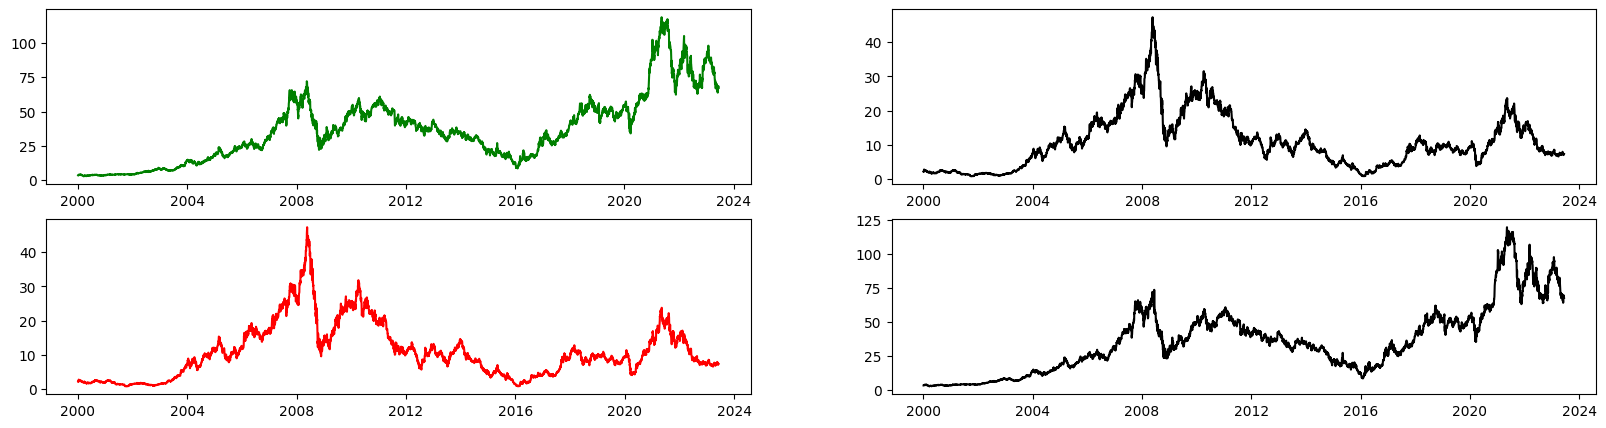

In [ ]:
fig2, eixo2 = plt.subplots(2,2, figsize=(20,5))



eixo2[0,0].plot(df_juntos.Date, df_juntos.Close_vale, color='green')
eixo2[0,1].plot(df_juntos.Date, df_juntos.Close_usim, color='black')
eixo2[1,0].plot(df_juntos.Date, df_juntos.Open_usim, color='red')
eixo2[1,1].plot(df_juntos.Date, df_juntos.Open_vale, color='black')

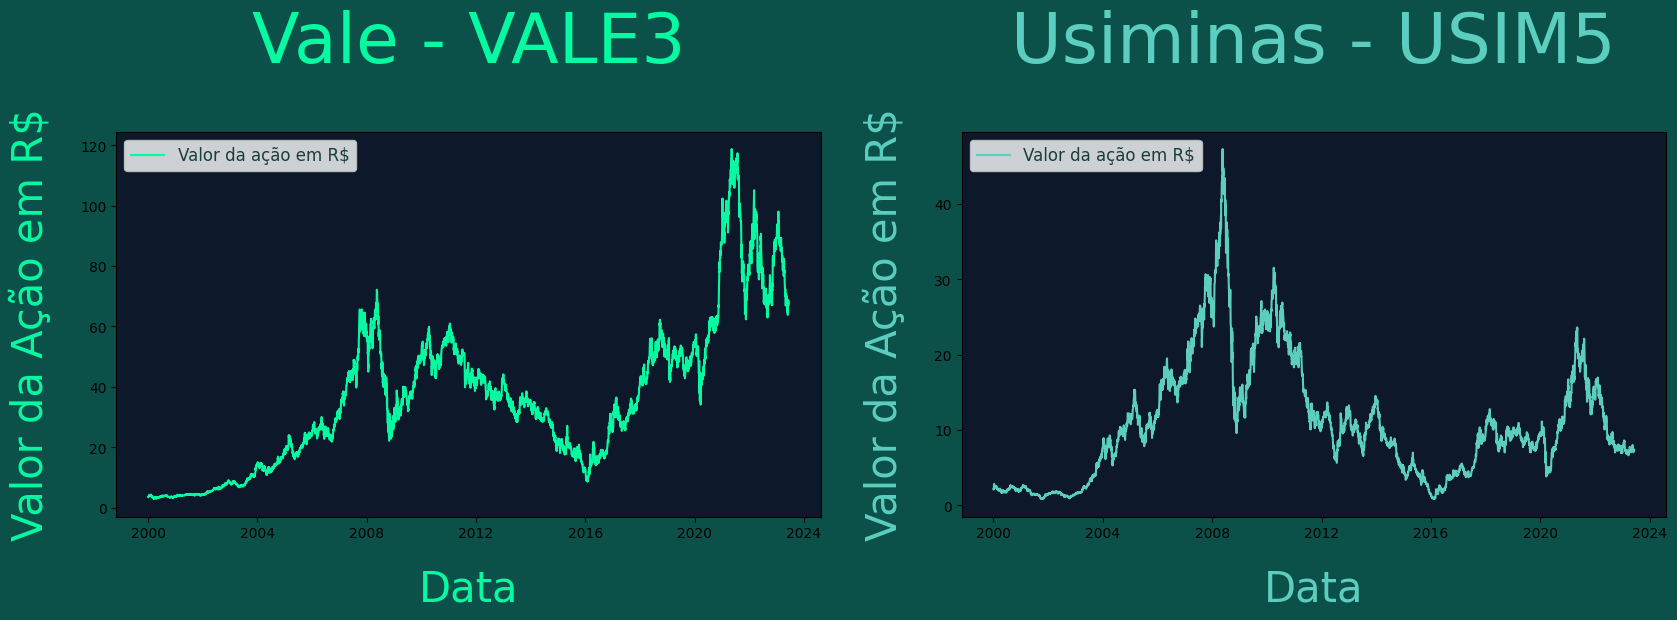

In [ ]:
fig2, eixo2 = plt.subplots(1,2, figsize=(20,5), facecolor= '#0c5149')


eixo2[0].plot(df_juntos.Date, df_juntos.Close_vale, color='#07f9a2')
eixo2[0].set_title('Vale - VALE3', fontsize=50, pad=50, color='#07f9a2')
eixo2[0].set_ylabel('Valor da Ação em R$', fontsize=30, labelpad=20, color='#07f9a2')
eixo2[0].set_xlabel('Data', fontsize=30, labelpad=20, color='#07f9a2')
eixo2[0].legend(['Valor da ação em R$'], loc='upper left' , fontsize=12, labelcolor='#1c3e38')
eixo2[0].set_facecolor('#0d192b')
eixo2[1].plot(df_juntos.Date, df_juntos.Close_usim, color='#5bcebf')
eixo2[1].set_title('Usiminas - USIM5', fontsize=50, pad=50, color='#5bcebf')
eixo2[1].set_ylabel('Valor da Ação em R$', fontsize=30, labelpad=20, color='#5bcebf')
eixo2[1].set_xlabel('Data', fontsize=30, labelpad=20, color='#5bcebf')
eixo2[1].legend(['Valor da ação em R$'], loc='upper left' , fontsize=12, labelcolor='#1c3e38')
eixo2[1].set_facecolor('#0d192b')
plt.show()

Padronização do eixo Y

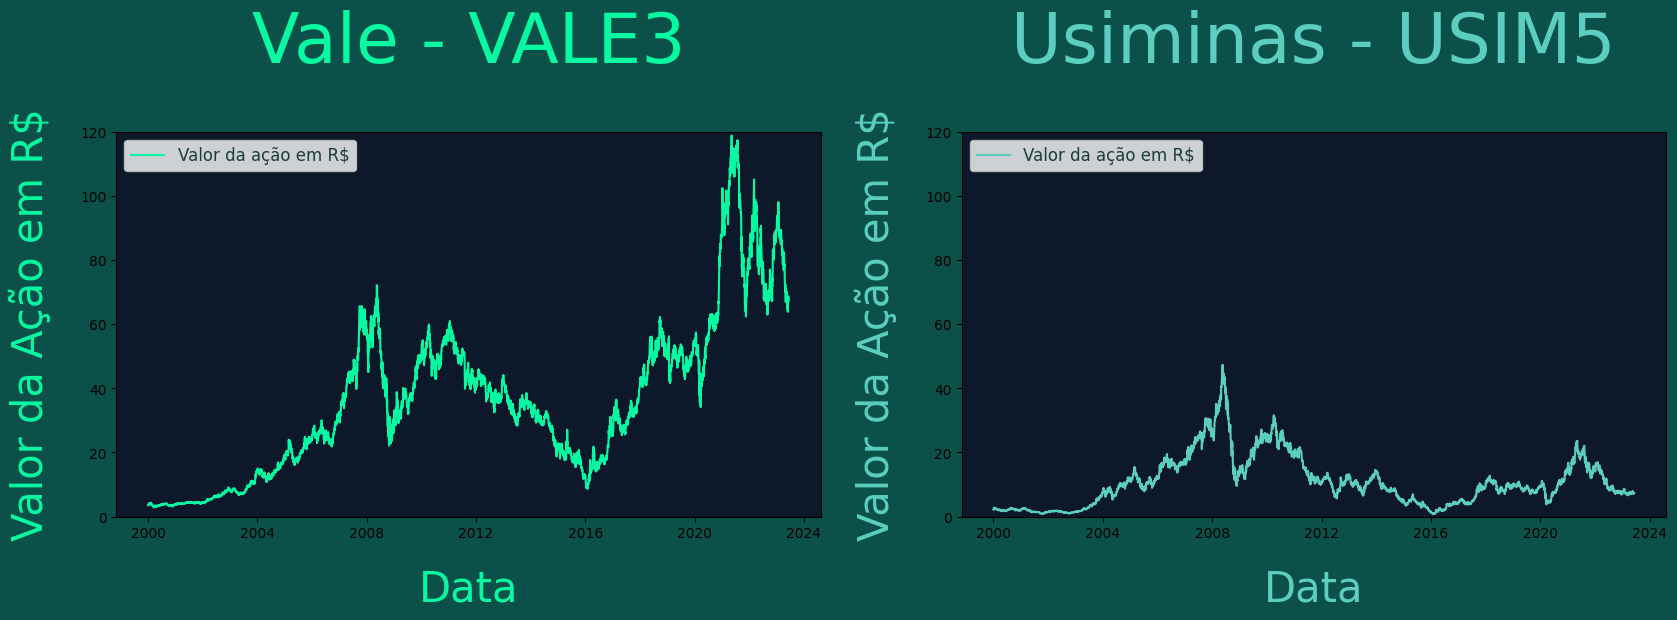

In [ ]:
fig2, eixo2 = plt.subplots(1,2, figsize=(20,5), facecolor= '#0c5149')


eixo2[0].plot(df_juntos.Date, df_juntos.Close_vale, color='#07f9a2')
eixo2[0].set_title('Vale - VALE3', fontsize=50, pad=50, color='#07f9a2')
eixo2[0].set_ylabel('Valor da Ação em R$', fontsize=30, labelpad=20, color='#07f9a2')
eixo2[0].set_xlabel('Data', fontsize=30, labelpad=20, color='#07f9a2')
eixo2[0].legend(['Valor da ação em R$'], loc='upper left' , fontsize=12, labelcolor='#1c3e38')
eixo2[0].set_facecolor('#0d192b')
eixo2[0].set_ylim(0, 120)

eixo2[1].plot(df_juntos.Date, df_juntos.Close_usim, color='#5bcebf')
eixo2[1].set_title('Usiminas - USIM5', fontsize=50, pad=50, color='#5bcebf')
eixo2[1].set_ylabel('Valor da Ação em R$', fontsize=30, labelpad=20, color='#5bcebf')
eixo2[1].set_xlabel('Data', fontsize=30, labelpad=20, color='#5bcebf')
eixo2[1].set_ylim(0, 120)
eixo2[1].legend(['Valor da ação em R$'], loc='upper left' , fontsize=12, labelcolor='#1c3e38')
eixo2[1].set_facecolor('#0d192b')
plt.show()

## Yahoo Finanças


In [ ]:
import yfinance as y

# Periodos: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max


usim = y.Ticker('USIM5.SA')
df_usim = usim.history('1mo')

vale = y.Ticker('VALE3.SA')
df_vale = vale.history('1mo')

df_usim.reset_index(inplace=True)
df_vale.reset_index(inplace=True)

df_usim_vale = pd.merge(df_usim, df_vale, on='Date', suffixes=['_usim', '_vale'])

df_usim_vale

,Date,Open_usim,High_usim,Low_usim,Close_usim,Volume_usim,Dividends_usim,Stock Splits_usim,Open_vale,High_vale,Low_vale,Close_vale,Volume_vale,Dividends_vale,Stock Splits_vale
0,2025-07-21 00:00:00-03:00,3.95,4.08,3.93,4.01,12587900,0.0,0.0,53.570210,54.893765,53.463938,54.149868,40484000,0.000000,0.0
1,2025-07-22 00:00:00-03:00,4.06,4.37,4.06,4.25,29209700,0.0,0.0,55.019359,56.004780,54.980714,55.550713,40945900,0.000000,0.0
2,2025-07-23 00:00:00-03:00,4.24,4.40,4.19,4.36,16457200,0.0,0.0,55.502408,55.937154,55.067663,55.473423,17914800,0.000000,0.0
3,2025-07-24 00:00:00-03:00,4.30,4.36,4.26,4.28,8258400,0.0,0.0,55.009695,55.347832,54.381732,54.613594,21651200,0.000000,0.0
4,2025-07-25 00:00:00-03:00,4.28,4.28,4.14,4.20,22658000,0.0,0.0,54.275460,54.372069,53.396310,53.811733,21918900,0.000000,0.0
5,2025-07-28 00:00:00-03:00,4.16,4.21,4.11,4.17,13833800,0.0,0.0,53.077496,53.444615,52.787667,53.290039,19175100,0.000000,0.0
6,2025-07-29 00:00:00-03:00,4.21,4.23,4.14,4.20,13417300,0.0,0.0,53.666815,53.811732,52.913259,52.961563,14648700,0.000000,0.0
7,2025-07-30 00:00:00-03:00,4.17,4.21,4.10,4.14,17296200,0.0,0.0,52.478513,52.835969,51.522077,52.014786,35607800,0.000000,0.0
8,2025-07-31 00:00:00-03:00,4.13,4.43,4.05,4.38,38212200,0.0,0.0,51.212925,51.802246,50.594622,51.647671,20790000,0.000000,0.0
9,2025-08-01 00:00:00-03:00,4.45,4.45,4.33,4.39,19730600,0.0,0.0,52.401228,53.038853,51.753939,51.927837,40510900,0.000000,0.0


## Exercícios

1) Colher os dados do mesmo período de duas empresas listadas na bolsa de valores que possuem o mesmo seguimento, e plotar um grafico de comparação entre as duas.


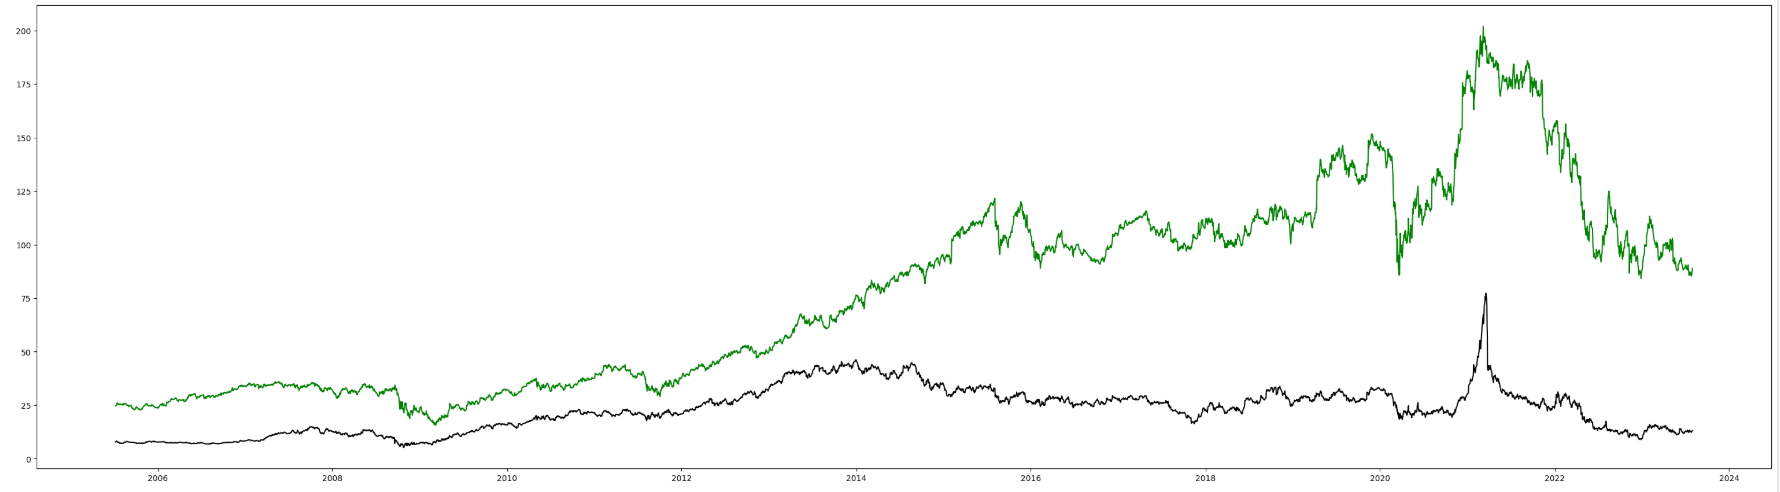

Importar Base

In [ ]:
import pandas as pd
import yfinance as y
from datetime import datetime
import matplotlib.pyplot as plt



itau = y.Ticker('ITUB')
df_itau = itau.history('1y')

bradesco = y.Ticker('BBD')
df_bradesco = bradesco.history('1y')


df_itau.reset_index(inplace = True)
df_bradesco.reset_index(inplace = True)

df_itau_brades = pd.merge(df_itau, df_bradesco, on = 'Date', suffixes=['_itau','_bradesco'])

df_itau_brades.head()


,Date,Open_itau,High_itau,Low_itau,Close_itau,Volume_itau,Dividends_itau,Stock Splits_itau,Open_bradesco,High_bradesco,Low_bradesco,Close_bradesco,Volume_bradesco,Dividends_bradesco,Stock Splits_bradesco
0,2024-10-02 00:00:00-04:00,5.600062,5.608446,5.491079,5.507845,24845700,0.002727,0.0,2.580811,2.590094,2.543677,2.571527,30230500,0.036,0.0
1,2024-10-03 00:00:00-04:00,5.373713,5.390480,5.289880,5.348563,26553340,0.000000,0.0,2.518554,2.537141,2.499967,2.527848,31557800,0.003,0.0
2,2024-10-04 00:00:00-04:00,5.340179,5.415629,5.331795,5.398862,18830350,0.000000,0.0,2.527848,2.574316,2.518554,2.537142,23230400,0.000,0.0
3,2024-10-07 00:00:00-04:00,5.356946,5.449162,5.356946,5.398862,19325460,0.000000,0.0,2.546435,2.602196,2.527848,2.537142,45378300,0.000,0.0
4,2024-10-08 00:00:00-04:00,5.340179,5.415629,5.340179,5.382096,20978210,0.000000,0.0,2.518554,2.555728,2.518554,2.546434,32432400,0.000,0.0


Mudar formato da coluna data.

In [ ]:
# usim5.Date = pd.to_datetime(usim5.Date)
df_itau_brades.Date = pd.to_datetime(df_itau_brades.Date)
df_itau_brades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype                           
---  ------                 --------------  -----                           
 0   Date                   250 non-null    datetime64[ns, America/New_York]
 1   Open_itau              250 non-null    float64                         
 2   High_itau              250 non-null    float64                         
 3   Low_itau               250 non-null    float64                         
 4   Close_itau             250 non-null    float64                         
 5   Volume_itau            250 non-null    int64                           
 6   Dividends_itau         250 non-null    float64                         
 7   Stock Splits_itau      250 non-null    float64                         
 8   Open_bradesco          250 non-null    float64                         
 9   High_bradesco          250 non-null    floa

Juntar as duas tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          22 non-null     datetime64[ns, America/New_York]
 1   Open          22 non-null     float64                         
 2   High          22 non-null     float64                         
 3   Low           22 non-null     float64                         
 4   Close         22 non-null     float64                         
 5   Volume        22 non-null     int64                           
 6   Dividends     22 non-null     float64                         
 7   Stock Splits  22 non-null     float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 1.5 KB


Trocar nome das colunas

Plotar o grafico

array([<Axes: title={'center': 'Itaú - ITAB'}, xlabel='Data', ylabel='Valor da ação em R$'>,
       <Axes: title={'center': 'Bradesco - BBD'}, xlabel='Data', ylabel='Valor da ação em R$'>],
      dtype=object)

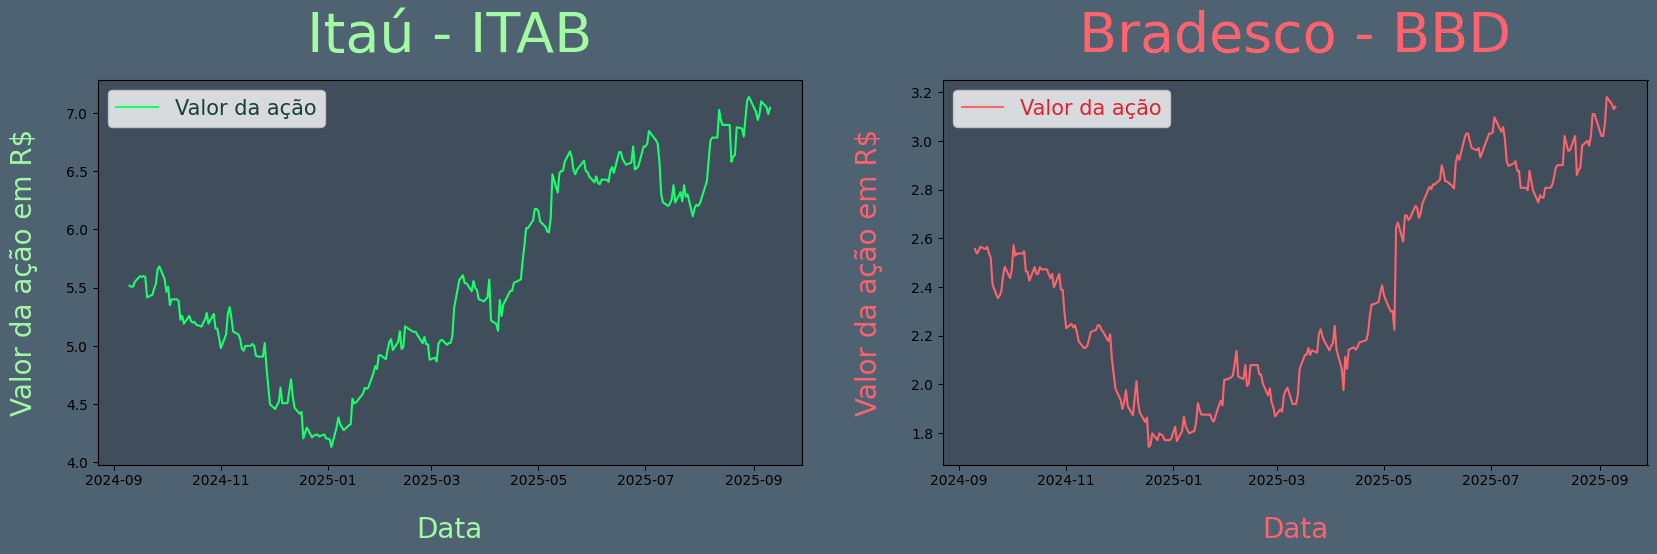

In [ ]:
fig_itabd, eixo_itabd = plt.subplots(1,2, figsize = (20,5), facecolor = '#4F6272')

eixo_itabd[0].plot(df_itau_brades.Date, df_itau_brades.Close_itau, color = '#18FF6D')
eixo_itabd[0].set_title('Itaú - ITAB', fontsize = 40, pad=20, color = '#A2FAA3')
eixo_itabd[0].set_ylabel('Valor da ação em R$', fontsize = 20, labelpad = 20, color = '#A2FAA3')
eixo_itabd[0].set_xlabel('Data', fontsize = 20, labelpad = 20, color = '#A2FAA3')
eixo_itabd[0].legend(['Valor da ação'], loc = 'upper left', fontsize = 15, labelcolor = '#1c3e38')
eixo_itabd[0].set_facecolor('#404E5C')

eixo_itabd[1].plot(df_itau_brades.Date, df_itau_brades.Close_bradesco, color = '#FF636E')
eixo_itabd[1].set_title('Bradesco - BBD', fontsize = 40, pad=20, color = '#FF636E')
eixo_itabd[1].set_ylabel('Valor da ação em R$', fontsize = 20, labelpad = 20, color = '#FF636E')
eixo_itabd[1].set_xlabel('Data', fontsize = 20, labelpad = 20, color = '#FF636E')
eixo_itabd[1].legend(['Valor da ação'], loc = 'upper left', fontsize = 15, labelcolor = '#DB2431')
eixo_itabd[1].set_facecolor('#404E5C')
eixo_itabd

2) Aplicar a função subplots e plotar os mesmos 2 gráficos separadamente.

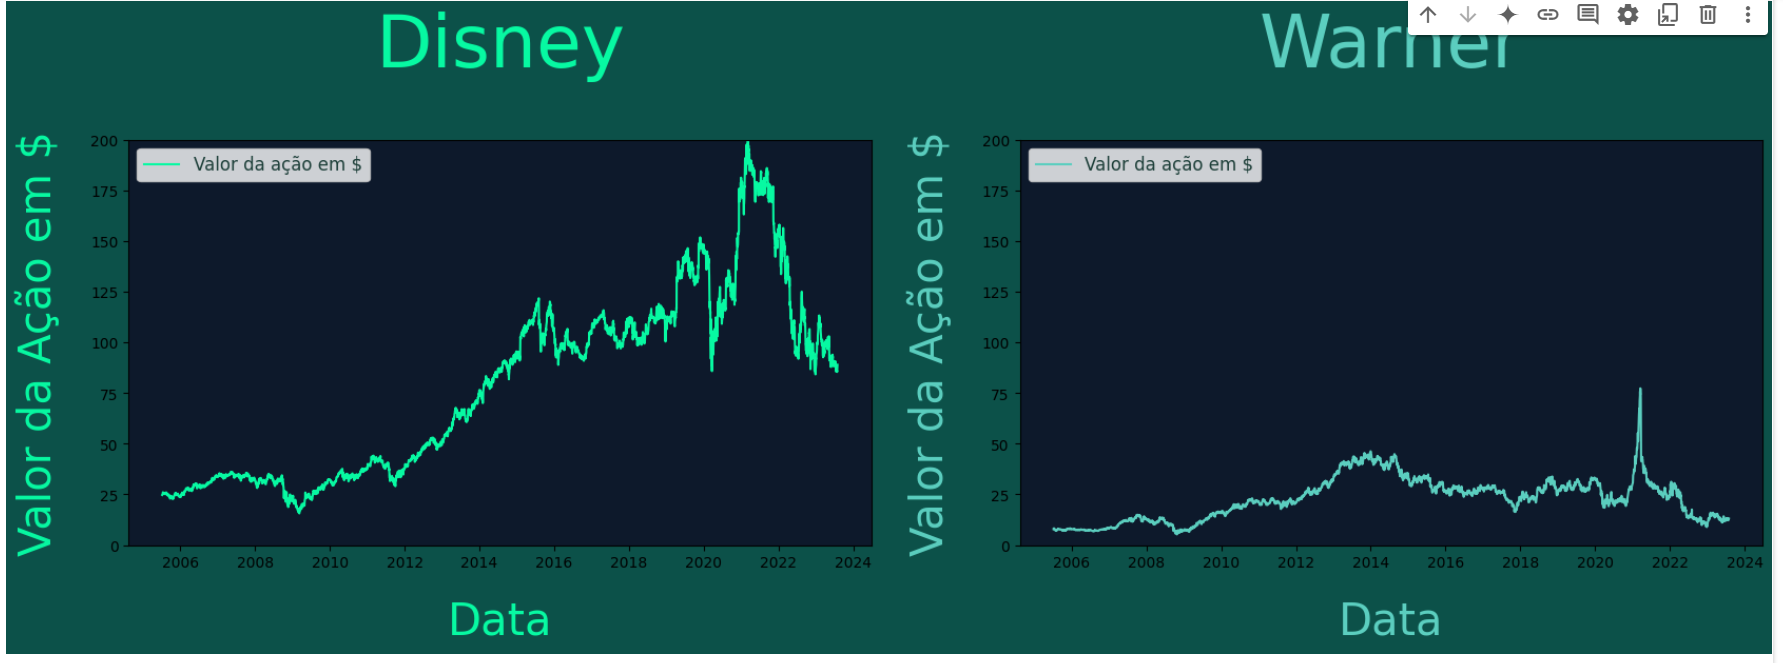